<a href="https://colab.research.google.com/github/IgorB99/aula_robotica/blob/master/aula_robotica_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#aula 17/09

34 30 67 67


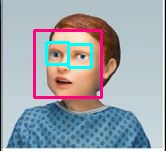

In [18]:
import numpy as np
import cv2
from IPython.display import Image

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
imagem = cv2.imread('Capturar.JPG')
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.03, 5)

if faces is ():
  print("sem face")
for (x,y,w,h) in faces:
  cv2.rectangle(imagem, (x,y) , (x+w,y+h) , (127,0,255),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = imagem[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  if eyes is ():
    print("sem olhos")
  elif eyes is (1):
    print("falta um olho")
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
print(x, y, w, h)

cv2.imwrite('img.jpg', imagem)
filename = "img.jpg"
display(Image(filename))

In [25]:
import cv2
import numpy as np
from IPython.display import Image

fece_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
img1 = cv2.imread("Capturar.JPG")
img2 = cv2.imread("Capturar2.JPG")
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
face1 = face_classifier.detectMultiScale(gray1, 1.03, 5)
face2 = face_classifier.detectMultiScale(gray2, 1.03, 5)

if face1 is ():
  print("sem face 1")
if face2 is ():
  print("sem face 2")

for (x1, y1, w1, h1) in face1:
  for (x2, y2, w2, h2) in face2:
    if x2 > x1 and w2 > w1:
      print("movimentou para direira")
    elif x2 < x1 and w2 < w1:
      print("movimentou para esquerda")
    elif y2 > y1 and h2 > h1:
      print("movimentou para baixo")
    elif y2 < y1 and h2 < h1:
      print("movimentou para cima")
    else:
      print("não se movimentou")



movimentou para direira


#aula 11/09

Contorno com threshold

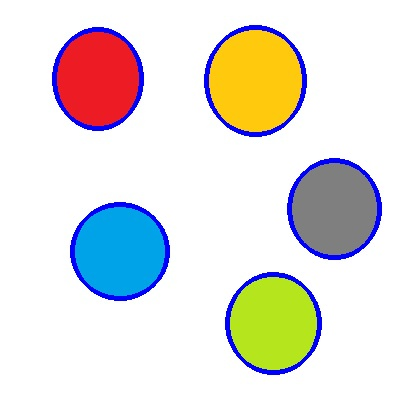

In [ ]:
import cv2
import numpy as np
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 23, 3)

contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]   
for contours in contours:
  area = cv2.contourArea(contours)
    
  if area > 10:
    cv2.drawContours(image, [contours], 0, (255, 0, 0), 3)

cv2.imwrite("thresh_circulos.jpg", image)
filename = "thresh_circulos.jpg"
display(Image(filename))

Contorno com canny

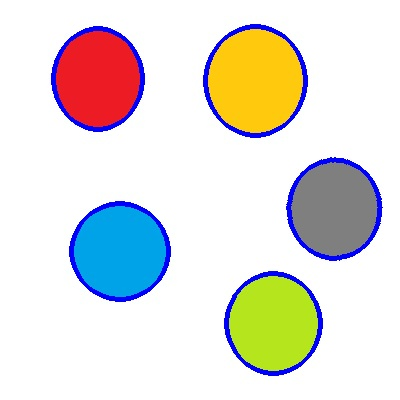

In [ ]:
import cv2
import numpy as np
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(img,20,100)

contours = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]   
for contours in contours:
  area = cv2.contourArea(contours)
    
  if area > 10:
    cv2.drawContours(image, [contours], 0, (255, 0, 0), 3)

cv2.imwrite("canny_circulos.jpg", image)
filename = "canny_circulos.jpg"
display(Image(filename))

#aula 10/09

mudar o brilho e contraste da imagem

In [ ]:
import cv2
import numpy as np

def contrasteBrilho(img, alpha, beta):
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      for c in range(img.shape[2]):
        img[y, x, c] = np.clip(alpha * img[y, x, c] + beta, 0, 255)
  cv2.imwrite("fileCB.jpg", img)

image = cv2.imread("file.jpg")

contrasteBrilho(img, 2, 100)



mudar a resolução da imagem

In [ ]:
import cv2
import numpy as np


def Resize_imagem(img, escale_percent):
  altura = int(img.shape[1] * escale_percent / 100)
  largura = int(img.shape[0] * escale_percent / 100)
  dim = (altura, largura)

  nova_imagem = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  cv2.imwrite("file" + str(escale_percent) + "%.jpg", nova_imagem)

image = cv2.imread("file.jpg")

Resize_imagem(image, 200)


valores de pico
91 	 5825 	 -5787
122 	 5482 	 -5178
127 	 5718 	 -5749
192 	 6017 	 -5936
196 	 6637 	 -6930


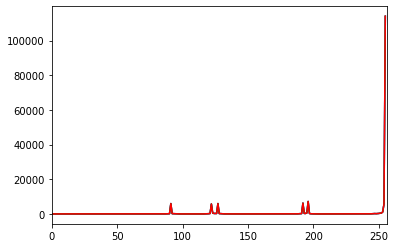

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width, bytesByPixel = np.shape(image)

histogram = cv2.calcHist([img],[0],None,[256],[0,256])
#for x in range(0,255):
#  print( x, "\t",int(histogram[x]),end="\n")

print("\nvalores de pico")
for i in range(254):
  pto_mais = histogram[i + 1] - histogram[i]
  pto_menos = histogram[i + 2] - histogram[i + 1]
  if (( pto_mais > 1000) and (pto_menos < 0) and pto_mais < 10000):
    print ( int(i + 1), "\t", int(pto_mais), "\t", int(pto_menos), end = "\n")

color = ("b", "g", "r")
for i, col in enumerate(color):
  histr = cv2.calcHist([img], [0], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

cv2.imwrite("teste.jpg", img)

Exercício

91 início: [55, 30], término: [140, 127]

122 início: [73, 209], término: [166, 294]

127 início: [297, 168], término: [378, 256]

192 início: [228, 281], término: [318, 369]

196 início: [208, 32], término: [303, 126]



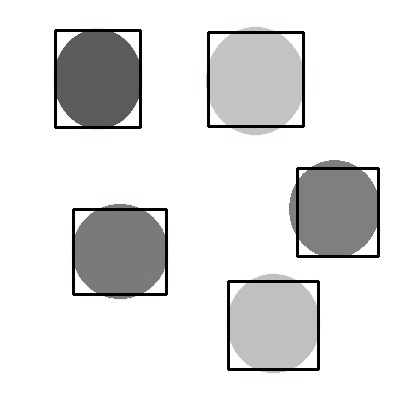

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from IPython.display import Image

image = cv2.imread("circulos.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
height, width = np.shape(img)

def coordenadas(pico):
  listPX = []
  listPY = []
  
  _, thresh1 = cv2.threshold(img, pico, 255, cv2.THRESH_TOZERO_INV)
  _, thresh2 = cv2.threshold(thresh1, pico - 1, 255, cv2.THRESH_TOZERO)

  blur = cv2.blur(thresh2, (3,3))

  for py in range(height):
   for px in range(width):
      if blur[py][px] == pico:
        listPX.append(px)
        listPY.append(py)
  
  inicio = [min(listPX), min(listPY)]
  termino = [max(listPX), max(listPY)] 
  cv2.rectangle(img, (min(listPX), min(listPY)), (max(listPX), max(listPY)), [0, 0, 0],2)
  print(str(pico) + " início: " + str(inicio) + ", término: " + str(termino) + "\n")
  return img

histogram = cv2.calcHist([img],[0],None,[256],[0, 256])
for i in range(254):
  pto_mais = histogram[i + 1] - histogram[i]
  pto_menos = histogram[i + 2] - histogram[i + 1]
  if (( pto_mais > 100) and (pto_menos < 0)):
    coordenadas(i + 1)

cv2.imwrite("new_circulos.jpg", img)
filename = "new_circulos.jpg"
display(Image(filename))

#aula 04/09

In [ ]:
import cv2
import numpy as np

image = cv2.imread("file.jpg")
height, width, bytesByPixel = np.shape(image)
img = np.zeros([height, width, 3])

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][0]
    img[py][px][1] = image[py][px][0]
    img[py][px][2] = image[py][px][0]
cv2.imwrite("file1.jpg", img)

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][1]
    img[py][px][1] = image[py][px][1]
    img[py][px][2] = image[py][px][1]
cv2.imwrite("file2.jpg", img)

for py in range(height):
  for px in range(width):
    img[py][px][0] = image[py][px][2]
    img[py][px][1] = image[py][px][2]
    img[py][px][2] = image[py][px][2]
cv2.imwrite("file3.jpg", img)

img1 = cv2.imread("file1.jpg", 0)
img2 = cv2.imread("file2.jpg", 0)
img3 = cv2.imread("file3.jpg", 0)
ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
ret, thresh3 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite("file1v2.jpg", thresh1)
cv2.imwrite("file2v2.jpg", thresh2)
cv2.imwrite("file3v2.jpg", thresh3)

True

#aula 03/09

In [ ]:
import cv2
import numpy as np

image = cv2.imread("file.jpg")
height, width, bytesByPixel = np.shape(image)
img = np.zeros([height, width, 3])

for py in range(height):
  for px in range(width):
    c = (image[py][px][0] * 0.11) + (image[py][px][1] * 0.59) + (image[py][px][2] * 0.29)
    img[py][px][0] = c
    img[py][px][1] = c
    img[py][px][2] = c
cv2.imwrite("fileC.jpg", img)

True

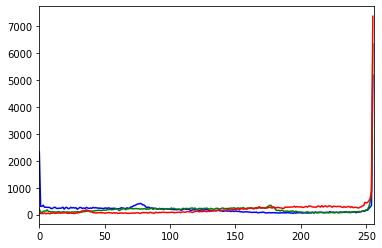

In [ ]:
import cv2
import matplotlib.pylab as plt

imagem = cv2.imread("file.jpg")
color = ("b", "g", "r")
for i, col in enumerate(color):
  histr = cv2.calcHist([imagem], [i], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

#aula 28/08

In [ ]:
import cv2
import numpy as np

image = cv2.imread("color_img.png")
altura, largura, vytesPorPixel = np.shape(image)

for index in range(3):
  if index == 0:
    print("azul")
  elif index == 1:
    print("verde")
  else:
    print("vermelho")
  for py in range(altura):
    for px in range(largura):
      print(image[py][px][index], '\t', end='')
    print("\n")

azul
0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	

verde
255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

vermelho
255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	255 	255 	255 	

255 	255 	255 	255 	255 	255 	255 	2

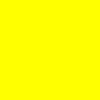

In [ ]:
from IPython.display import Image

filename = "color_img.png"

display(Image(filename))

#aula 27/08

lista: um array

In [ ]:
lista1 = [1, 2, 3, "oi"]
print(lista1[1])

2


tuplas: um array cujo valor não pode ser alterado

In [ ]:
tuplas1 = (1, 2, 3, "oi")
print(tuplas1[1])

2


dicionário: um array onde cada valor possui um index

In [ ]:
dicionario1 = {"arroz" : 13.5, "feijão" : 10.3, "carne" : 6.9}
print(dicionario1["feijão"])

10.3


In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a[1][0])

4


Exercício 1

In [ ]:
L = [5, 7, 2, 9, 4, 1, 3]
a = len(L)
b = max(L)
c = min(L)
d = 0
for x in range(a):
  d += L[x]

print("a = " + str(a))
print("b = " + str(b))
print("c = " + str(c))
print("d = " + str(d))
L.sort()
print("e = " + str(L))
L.reverse()
print("f = " + str(L))


a = 7
b = 9
c = 1
d = 31
e = [1, 2, 3, 4, 5, 7, 9]
f = [9, 7, 5, 4, 3, 2, 1]


Exercício 2

In [ ]:
x = int(input("digite um valor: "))
y = int(input("digite outro valor: "))
z = ((x * 2) + (y * 2)) * ((x - y) * (x - y))
print(z)

digite um valor: 2
digite outro valor: 3
10


Exercício 3

In [ ]:
Lanchonete = {"salgado" : 4.5, "lanche" : 6.5, "suco" : 3, "refrigerante": 3.5, "doce": 1}
print(Lanchonete)

{'salgado': 4.5, 'lanche': 6.5, 'suco': 3, 'refrigerante': 3.5, 'doce': 1}


# aula 21/08

exemplo 1

In [ ]:
print("Hello World")

Hello World


exemplo 2

In [1]:
import cv2
import numpy as np

altura = 10
largura = 10
img = np.zeros([altura, largura, 3])
for py in range(altura):
  for px in range(largura):
    img[py][px][0] = 67
    img[py][px][1] = 125
    img[py][px][2] = 231
cv2.imwrite("color_img.png", img)


True